# Genotype simulation

In [1]:
import admix
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# specify parameters
n_indiv = 1000
anc_props = [0.2, 0.8]

In [3]:
# specify reference data sets
dset_dir = admix.dataset.get_test_data_dir()
ref_dset = admix.io.read_dataset(os.path.join(dset_dir, "toy-all"))
ref_dset_list = [
    ref_dset[:, (ref_dset.indiv.Population == pop).values] for pop in ["CEU", "YRI"]
]

In [4]:
# simulate 8 generations
mosaic_size = admix.simulate.calculate_mosaic_size(
    ref_dset.snp, "hg38", chrom=22, n_gen=8
)

np.random.seed(1234)
dset = admix.simulate.admix_geno(
    geno_list=[dset.geno for dset in ref_dset_list],
    df_snp = ref_dset_list[0].snp,
    n_indiv=n_indiv,
    anc_props=[0.2, 0.8],
    mosaic_size=mosaic_size,
)

2024-02-14 18:44:05 [info     ] genetic_map found at /home/runner/work/admix-kit/admix-kit/admix/../.admix_cache/data/genetic_map/genetic_map_hg38_withX.txt.gz.


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 40051.60it/s]

In [5]:
dset

admix.Dataset object with n_snp x n_indiv = 1834 x 1000, n_anc=2
	snp: 'CHROM', 'POS', 'REF', 'ALT'

/home/runner/work/admix-kit/admix-kit/admix/plot/_plot.py:345: UserWarning: Only the first 10 are plotted. To plot more individuals, increase `max_indiv`
  warnings.warn(


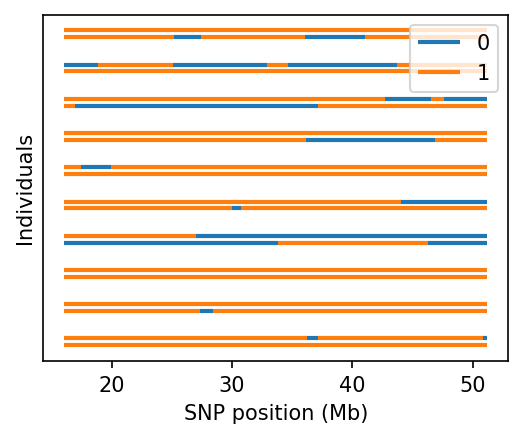

In [6]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
admix.plot.lanc(dset, ax=ax)

admix.data.af_per_anc:   0%|          | 0/1 [00:00<?, ?it/s]

admix.data.af_per_anc: 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]

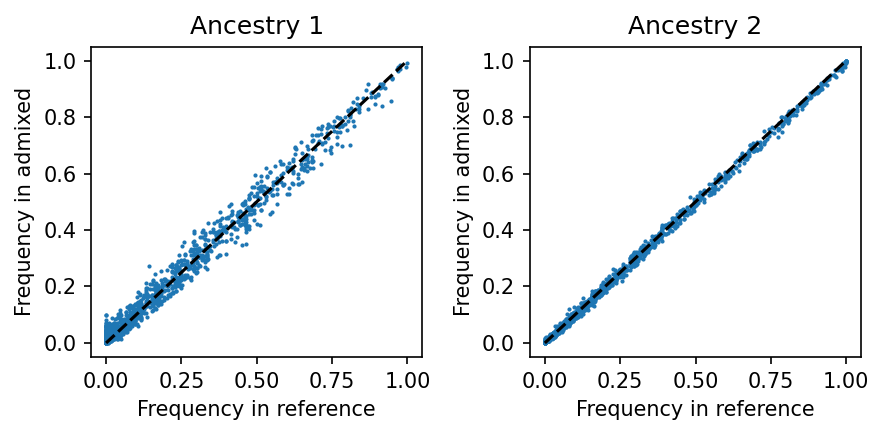

In [7]:
# sanity check for the consistency of frequency calculated in the reference data sets
# and the frequency calculated in the admixed data set
fig, axes = plt.subplots(figsize=(6, 3), dpi=150, ncols=2)
for i in range(dset.n_anc):
    axes[i].scatter(
        ref_dset_list[i].geno.mean(axis=[1, 2]), dset.af_per_anc()[:, i], s=1
    )
    axes[i].set_title(f"Ancestry {i + 1}")
    axes[i].set_xlabel("Frequency in reference")
    axes[i].set_ylabel("Frequency in admixed")
    axes[i].plot([0, 1], [0, 1], "k--")

fig.tight_layout()